In [1]:
# ruff: noqa: E402
import pandas as pd
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
import numpy as np

# Moons

In [ ]:
X, y = make_moons(n_samples=2**10, noise=0.1, random_state=42)
data = pd.DataFrame(np.hstack([X, y.reshape(-1, 1)]))
data.to_csv("../data/moons.csv", index=False, header=None)

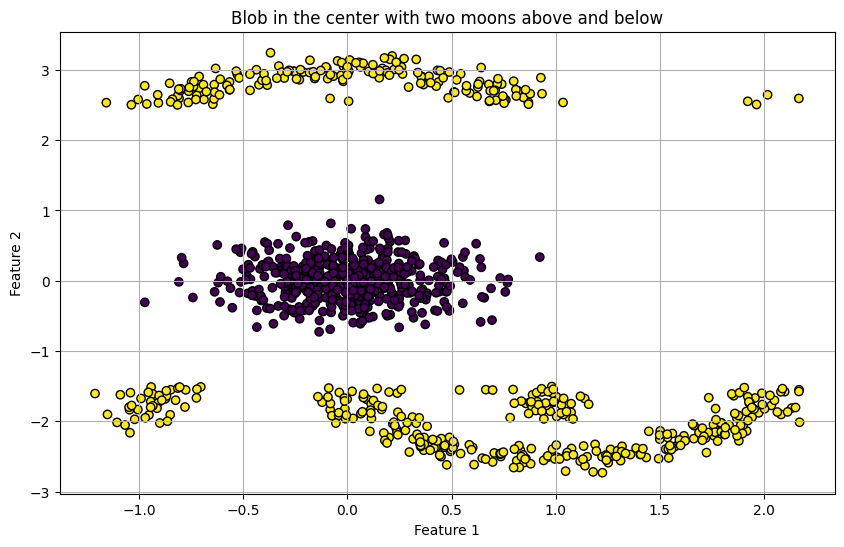

In [1]:
# Creating the blob dataset
blob_center = make_blobs(
    n_samples=500, centers=[(0, 0)], cluster_std=0.3, random_state=42
)

# Creating the moons dataset
moons = make_moons(n_samples=500, noise=0.1, random_state=42)

# Adjusting the position of the moons
moons_upper = moons[0][moons[0][:, 1] > 0.5]
moons_lower = moons[0][moons[0][:, 1] <= 0.5]
moons_upper[:, 1] += 2
moons_lower[:, 1] -= 2

# Combining the datasets
X_combined = np.vstack((blob_center[0], moons_upper, moons_lower))
y_combined = np.hstack(
    (
        np.zeros(blob_center[0].shape[0]),
        np.ones(moons_upper.shape[0]),
        np.ones(moons_lower.shape[0]),
    )
)

# Plotting the combined dataset
plt.figure(figsize=(10, 6))
plt.scatter(
    X_combined[:, 0],
    X_combined[:, 1],
    c=y_combined,
    cmap="viridis",
    marker="o",
    edgecolor="k",
)
plt.title("Blob in the center with two moons above and below")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

import pandas as pd

# Creating a DataFrame for the combined dataset
df_combined = pd.DataFrame(X_combined, columns=["Feature 1", "Feature 2"])
df_combined["Label"] = y_combined

# Saving the combined dataset to a CSV file
df_combined.to_csv("../data/moons_with_blob.csv", index=False)

In [2]:
df_combined

,Feature 1,Feature 2,Label
0,-0.156817,0.314703,0.0
1,-0.218141,-0.074256,0.0
2,-0.193972,-0.324464,0.0
3,-0.180512,0.555683,0.0
4,-0.258124,-0.115367,0.0
...,...,...,...
995,1.859859,-1.888073,1.0
996,0.781512,-1.947746,1.0
997,0.112622,-1.880665,1.0
998,0.508698,-2.286530,1.0


# HELOC

In [12]:
df = pd.read_csv("../data/heloc.csv")

In [ ]:
# drop rows which contains -9 values


In [8]:
df_clean = df.replace(-9, np.nan).dropna()

In [11]:
df_clean[df_clean["NumInstallTradesWBalance"] == -8]

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
1,Bad,61.0,58.0,15.0,41.0,2.0,4.0,4.0,100.0,-7.0,...,67.0,0.0,0.0,0.0,0.0,-8.0,0.0,-8.0,-8.0,0.0
13,Good,69.0,256.0,6.0,117.0,11.0,1.0,1.0,100.0,-7.0,...,8.0,0.0,0.0,0.0,13.0,-8.0,2.0,-8.0,0.0,67.0
18,Bad,89.0,244.0,9.0,147.0,10.0,0.0,0.0,100.0,-7.0,...,10.0,0.0,0.0,0.0,3.0,-8.0,2.0,-8.0,0.0,50.0
35,Good,88.0,153.0,33.0,92.0,13.0,0.0,0.0,100.0,-7.0,...,7.0,0.0,0.0,0.0,1.0,-8.0,1.0,-8.0,0.0,25.0
37,Bad,70.0,127.0,25.0,57.0,23.0,0.0,0.0,96.0,-8.0,...,13.0,0.0,0.0,0.0,51.0,-8.0,9.0,-8.0,1.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10422,Good,86.0,181.0,3.0,89.0,11.0,0.0,0.0,100.0,-7.0,...,9.0,1.0,2.0,2.0,5.0,-8.0,2.0,-8.0,0.0,50.0
10425,Bad,80.0,40.0,40.0,40.0,1.0,0.0,0.0,100.0,-7.0,...,0.0,-8.0,0.0,0.0,27.0,-8.0,1.0,-8.0,-8.0,100.0
10438,Good,79.0,120.0,2.0,43.0,13.0,0.0,0.0,100.0,-7.0,...,7.0,4.0,2.0,1.0,15.0,-8.0,4.0,-8.0,0.0,44.0
10447,Good,93.0,417.0,25.0,235.0,9.0,0.0,0.0,100.0,-7.0,...,22.0,-8.0,1.0,0.0,0.0,-8.0,1.0,-8.0,0.0,40.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

heloc_df = pd.read_csv("../data/heloc.csv")
heloc_df["RiskPerformance"] = heloc_df["RiskPerformance"].map({"Bad": 0, "Good": 1})

# Prepare the data for modeling
X = heloc_df.drop("RiskPerformance", axis=1)
y = heloc_df["RiskPerformance"]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the training data
X_train = scaler.fit_transform(X_train)

# Scale the testing data
X_test = scaler.transform(X_test)


# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame(
    rf_model.feature_importances_, index=X.columns, columns=["importance"]
).sort_values("importance", ascending=False)
feature_importances

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

min_features_to_select = 3  # Minimum number of features to consider
clf = LogisticRegression(max_iter=200)
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X_train, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

selected_features_rfecv = X.columns[rfecv.support_]
print(selected_features_rfecv)

## prepr

In [ ]:
df = pd.read_csv("../data/heloc.csv")
df["RiskPerformance"] = df["RiskPerformance"].map({"Bad": 0, "Good": 1})

In [ ]:
target_column = "RiskPerformance"
feature_columns = df.columns.drop(target_column)
df

# Adult

In [ ]:
df = pd.read_csv("../data/adult.csv")

In [ ]:
df.columns

In [ ]:
df = pd.concat(
    [
        df[df["income"] == 0].sample(df["income"].sum(), random_state=42),
        df[df["income"] == 1],
    ]
)

In [ ]:
df["income"].value_counts()

In [ ]:
df["workclass"].value_counts()
# df["education"].value_counts()
# df["marital_status"].value_counts()
# df["occupation"].value_counts()
df["gender"].value_counts()
df["race"].value_counts()

In [ ]:
df

# LAW

In [ ]:
df_law = pd.read_csv("../data/law.csv")
columns = ["lsat", "gpa", "zfygpa", "pass_bar", "sex", "race"]
df_law = df_law[columns]
df_law.dropna().corr()

In [ ]:
df_law["race"].value_counts()

In [ ]:
sum(df_law["pass_bar"] == 0)

# Compas

In [ ]:
df = pd.read_csv("../data/compas_two_years.csv", index_col="id")

In [ ]:
columns = [
    "age",
    "sex",
    "race",
    "priors_count",
    "days_b_screening_arrest",
    "c_jail_in",
    "c_jail_out",
    "c_charge_degree",
    "is_recid",
    "is_violent_recid",
    "two_year_recid",
    "decile_score",
    "score_text",
]
df = df[columns]
df["days_b_screening_arrest"] = np.abs(df["days_b_screening_arrest"])
df["c_jail_out"] = pd.to_datetime(df["c_jail_out"])
df["c_jail_in"] = pd.to_datetime(df["c_jail_in"])
df["length_of_stay"] = np.abs((df["c_jail_out"] - df["c_jail_in"]).dt.days)
df["length_of_stay"].fillna(df["length_of_stay"].value_counts().index[0], inplace=True)
df["days_b_screening_arrest"].fillna(
    df["days_b_screening_arrest"].value_counts().index[0], inplace=True
)
df["length_of_stay"] = df["length_of_stay"].astype(int)
df["days_b_screening_arrest"] = df["days_b_screening_arrest"].astype(int)
df = df[df["score_text"] != "Medium"]
df["class"] = pd.get_dummies(df["score_text"])["High"].astype(int)
df.drop(["c_jail_in", "c_jail_out", "decile_score", "score_text"], axis=1, inplace=True)

In [ ]:
df

# German credit

In [ ]:
df = pd.read_csv("../data/german_credit.csv")

In [ ]:
df["default"].value_counts()

# MNIST

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
X, y = load_digits(n_class=2, return_X_y=True)

In [ ]:
X.shape

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load the MNIST dataset
X, y = load_digits(n_class=2, return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y
)

# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca.shape

# Polish bankruptcy

In [ ]:
import pandas as pd
import os


def convert_arff_to_csv(arff_path):
    # Using pandas to read the ARFF file
    # skiprows is used to skip the file's header information
    data = pd.read_csv(arff_path, comment="@", header=None)

    # Extracting the attribute names from the file
    attribute_names = []
    with open(arff_path, "r") as file:
        for line in file:
            if line.startswith("@attribute"):
                attribute_name = line.split(" ")[1].strip()
                attribute_names.append(attribute_name)

    # Assigning the attribute names to the dataframe columns
    data.columns = attribute_names

    # Saving to a CSV file
    # csv_path = arff_path.replace(".arff", ".csv")
    # data.to_csv(csv_path, index=False)

    return data


# csv_file_path = convert_arff_to_csv(file_path)
# csv_file_path

In [ ]:
import numpy as np

df = pd.read_csv("../data/polish_bankruptcy.csv")
# map values in the df from '?' to np.nan
df = df.replace("?", np.nan)
df.shape

In [ ]:
df = df.loc[:, df.isnull().mean() < 0.01].dropna()

# corr_matrix = df.corr().abs()
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# df.drop(to_drop, axis=1, inplace=True)

In [ ]:
df.shape

In [ ]:
df["class"].value_counts()

In [ ]:
df = pd.concat(
    [
        df[df["class"] == 0].sample(df["class"].sum(), random_state=42),
        df[df["class"] == 1],
    ]
)

In [ ]:
df.shape

In [ ]:
arff_paths = [f"../data/{p}" for p in os.listdir("../data") if p.endswith(".csv")]

dfs = []
for arff_path in arff_paths:
    df = convert_arff_to_csv(arff_path)
    dfs.append(df)
df = pd.concat(dfs)
df.to_csv("../data/polish_bankruptcy.csv", index=False)

# Audit

In [ ]:
df = pd.read_csv("../data/audit.csv")
df.corr()

df = df[df.columns[2:]]
df["Risk"].value_counts()
df["Audit_Risk"].corr(df["Risk"])